
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1
...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0
269,57,0,0,140,241,1,123,0
270,45,1,3,110,264,1,132,0
271,68,1,0,144,193,1,141,0


In [4]:
ha['cp'].value_counts()

0    128
2     81
1     44
3     20
Name: cp, dtype: int64

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [5]:
# Defining the response and predictor variables
X = ha[['age', 'chol']]
y = ha['cp']

In [6]:
# Splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

*KNN*

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters for tuning
param_grid1 = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

In [50]:
# Performing a GridSearchCV
grid_search1 = GridSearchCV(estimator=knn, param_grid=param_grid1, cv=5, scoring='accuracy')
grid_search1.fit(X_train, y_train)

# Defining the best hyperparameters and model
best_model1 = grid_search1.best_estimator_

In [51]:
# Printing out the test accuracy
accuracy1 = best_model1.score(X_test, y_test)
print(f"Test Accuracy: KNN k=11 [{accuracy1}]")

Test Accuracy: KNN k=11 [0.4057971014492754]


In [52]:
# Printing out the best hyperparameters
best_params1 = grid_search1.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [53]:
from sklearn.model_selection import cross_val_score

cv_acc_scores1 = cross_val_score(best_model1, X_train, y_train, cv=5, scoring='accuracy')
avg_acc_score1 = cv_acc_scores1.mean()

print(f"Average Cross-Validated Accuracy: KNN k=11 [{avg_acc_score1}]")

Average Cross-Validated Accuracy: KNN k=11 [0.48024390243902443]


_Decision Tree_

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Defining hyperparameters for tuning
param_grid2 = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

dt_class = DecisionTreeClassifier(random_state=42)

In [15]:
# Performing a GridSearchCV
grid_search2 = GridSearchCV(dt_class, param_grid2, cv=5, n_jobs=-1, verbose=1)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [16]:
# Defining the best hyperparameters and model
best_model2 = grid_search2.best_estimator_

In [17]:
# Printing out the test accuracy
accuracy2 = best_model2.score(X_test, y_test)
print(f"Test Accuracy: Decision Tree [{accuracy2}]")

Test Accuracy: Decision Tree [0.463768115942029]


In [18]:
# Printing out the best hyperparameters
best_params2 = grid_search2.best_params_
print("Best Hyperparameters: Decision Tree", best_params2)

Best Hyperparameters: Decision Tree {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [46]:
# Calculating the average accuracy across all folds
cv_acc_scores2 = cross_val_score(best_model2, X_train, y_train, cv=5, scoring='accuracy')

In [47]:
avg_acc_score2 = cv_acc_scores2.mean()
print(f"Average Cross-Validated Decision Tree [{avg_acc_score2}]")

Average Cross-Validated Decision Tree [0.4607317073170732]


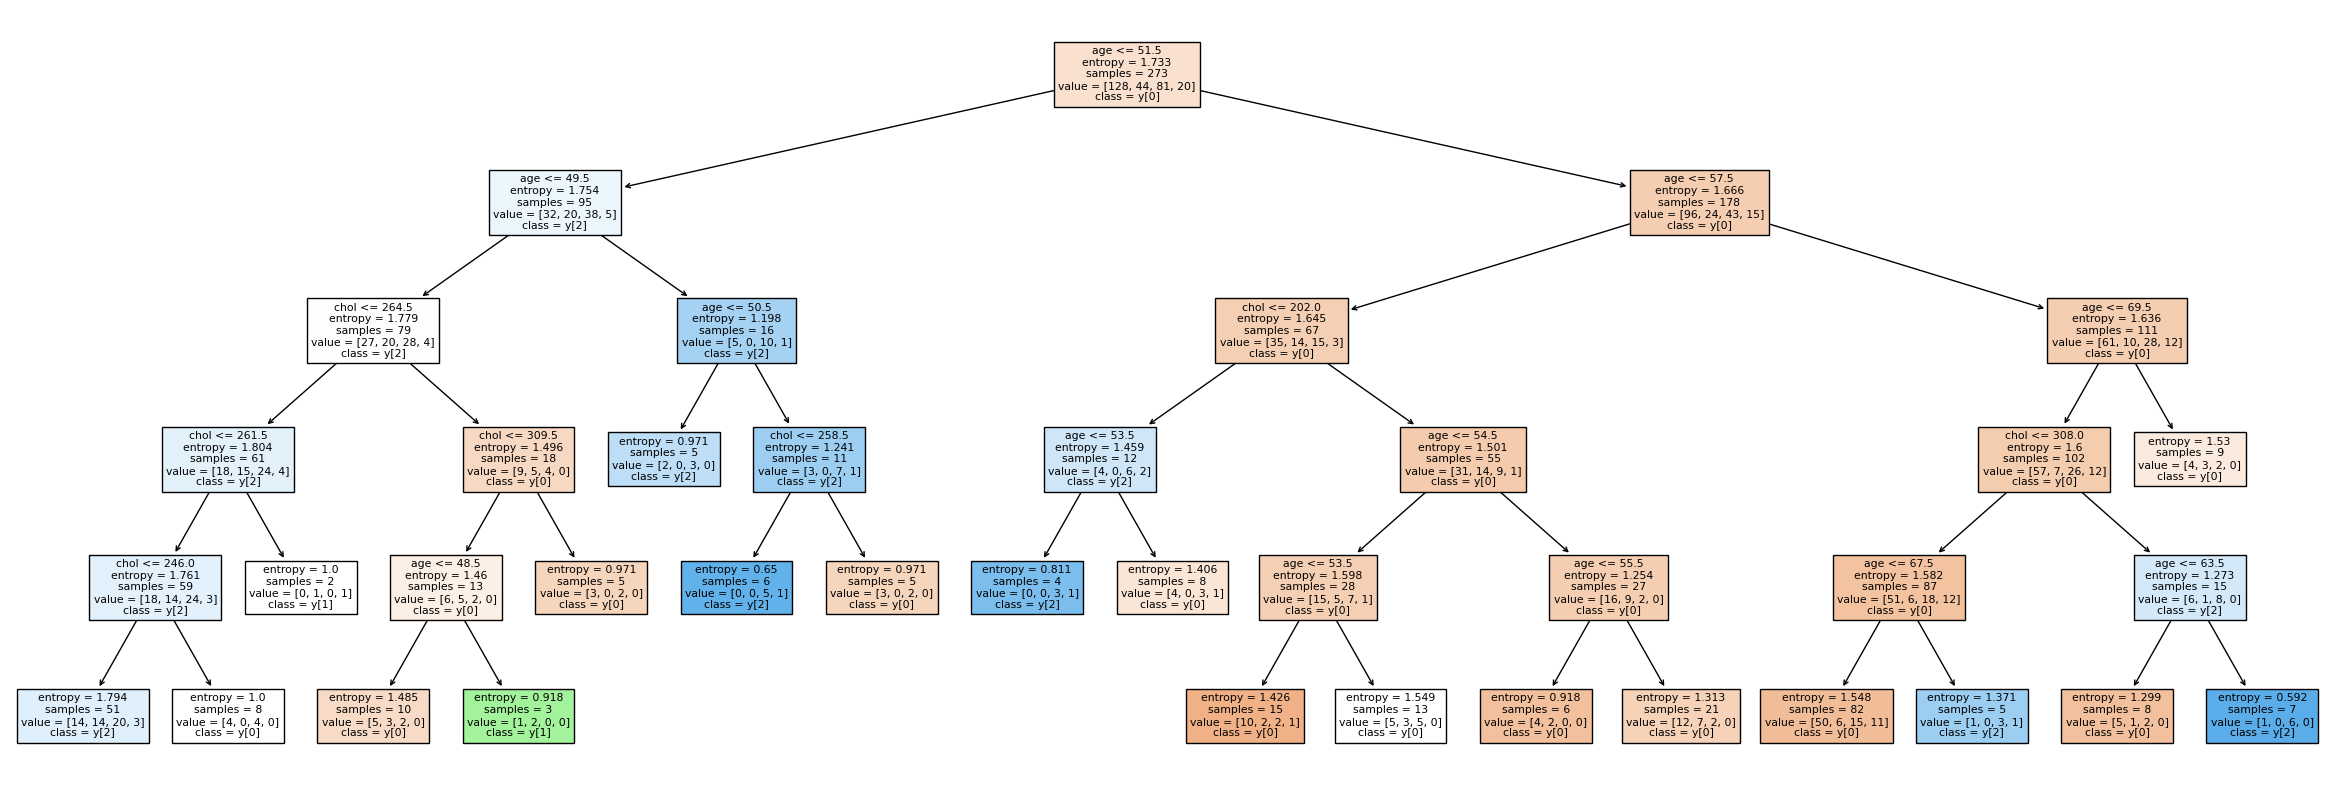

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = X_train.columns.tolist()

# Plotting the decision tree
plt.figure(figsize=(30,10))
plot_tree(best_model2, filled=True, feature_names=feature_names, class_names=True)
plt.show()

*    The root node is *age* and splits according to the value 51.5. There are 273 samples in this node and the value array [128, 44, 81, 20] shows the distribution of the four classes of chest pain in this group of patients. The dominant class is y[0]. The entropy level of 1.733 indicates a high level of impurity and subsequent splits in the tree should raise the purity at each node.
*    When *age* is less or equal to 51.5, the tree splits to *age* once again with a value of 49.5, with higher ages going to an *age* node once again and lower or equal to 49.5 age values going to the *chol* node. The entropy level is still quite high at 1.754, and the less than 51.5 node split has 95 samples, and contains values [32, 20, 38, 5]. the dominant class at this node is y[2].
*    When *age* is greater than 51.5, the tree splits into another *age* node with an age of 57.5 deciding the split. Ages higher than 57.5 will proceed to another *age* node with a value of 69.5, and ages less than or equal to 57.5 will proceed to the *chol* node. The entropy is also high on this side with a value of 1.645, which indicates the classes are still very mixed. There are 67 samples at this node, and the values are [35, 14, 15, 3] and the dominant class is y[0].

*LDA*

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
# Printing out the test accuracy
accuracy3 = lda.score(X_test, y_test)
print(f"Test Accuracy: LDA [{accuracy3}]")

Test Accuracy: LDA [0.4927536231884058]


In [43]:
# Calculating the average accuracy across all folds
cv_acc_scores3 = cross_val_score(lda, X, y, cv=5, scoring='accuracy')

In [44]:
avg_acc_score3 = cv_acc_scores3.mean()
print(f"Average Cross-Validated LDA [{avg_acc_score3}]")

Average Cross-Validated LDA [0.4468013468013468]


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
ha['cp_is_3'] = ha['cp'].apply(lambda x: 1 if x == 3 else 0)
ha['cp_is_0'] = ha['cp'].apply(lambda x: 1 if x == 0 else 0)
ha['cp_is_1'] = ha['cp'].apply(lambda x: 1 if x == 1 else 0)
ha['cp_is_2'] = ha['cp'].apply(lambda x: 1 if x == 2 else 0)

In [ ]:
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_0,cp_is_1,cp_is_2
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,0,0,1
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,1,0,0
4,57,1,0,140,192,1,148,1,0,1,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initializing a dictionary to store F1 scores for each cp category
f1_scores = {}

for cp_category in [0, 1, 2, 3]:
    # Create a new binary target column for the current cp category
    ha[f'cp_is_{cp_category}'] = (ha['cp'] == cp_category).astype(int)

    # Prepare the Data (using only 'age' and 'chol' as predictors)
    X = ha[['age', 'chol']]  # Select only 'age' and 'chol' columns
    y = ha[f'cp_is_{cp_category}']

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make Predictions and Evaluate
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[cp_category] = f1

# Find the cp category with the highest F1 score
best_cp_category = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_cp_category]

print("F1 Scores for each cp category:", f1_scores)
print(f"Best performing cp category: {best_cp_category} with an F1 Score of {best_f1_score}")

F1 Scores for each cp category: {0: 0.6530612244897959, 1: 0.0, 2: 0.0, 3: 0.0}
Best performing cp category: 0 with an F1 Score of 0.6530612244897959


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the original data (excluding the target variable 'cp')
X = ha[['age', 'chol']]  # Select only 'age' and 'chol' columns
X_train, X_test, _, _ = train_test_split(X, ha['cp'], test_size=0.2, random_state=42)

# DataFrame to store probabilities
prob_df = pd.DataFrame(index=X_test.index)

for cp_category in [0, 1, 2, 3]:
    # Create a new binary target column for the current cp category
    ha[f'cp_is_{cp_category}'] = (ha['cp'] == cp_category).astype(int)
    y = ha[f'cp_is_{cp_category}']

    # Split the Data
    _, _, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Store Probabilities
    prob_df[f'cp_is_{cp_category}'] = model.predict_proba(X_test)[:, 1]

# Print the combined probabilities
print(prob_df)

      cp_is_0   cp_is_1   cp_is_2   cp_is_3
30   0.481824  0.141914  0.303729  0.065982
117  0.490596  0.118361  0.278035  0.114962
79   0.451055  0.149742  0.307239  0.085543
212  0.516760  0.119013  0.282750  0.076323
213  0.622825  0.070910  0.229846  0.098393
139  0.487671  0.125810  0.286450  0.095863
211  0.505875  0.126287  0.289785  0.071841
45   0.556032  0.099476  0.263462  0.082010
256  0.433860  0.177975  0.332665  0.055781
249  0.510197  0.126401  0.290580  0.067014
185  0.508800  0.118814  0.281310  0.086612
271  0.543834  0.093113  0.252900  0.124688
229  0.433574  0.158340  0.313302  0.089752
82   0.457922  0.145531  0.303867  0.086100
167  0.440965  0.158578  0.314747  0.079697
258  0.484163  0.129628  0.290338  0.090284
232  0.539346  0.099118  0.260555  0.106761
148  0.523544  0.112006  0.275091  0.086492
104  0.394101  0.203534  0.349241  0.059843
60   0.401578  0.187275  0.335895  0.075244
223  0.477053  0.141775  0.302827  0.071259
196  0.561130  0.109437  0.27743

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Assuming 'ha' is your dataframe

# Pairs of cp categories to compare
cp_pairs = [(0, 1), (0, 2), (0, 3)]
roc_auc_scores = {}

for pair in cp_pairs:
    # Reduce the dataset to only the two types of chest pain
    reduced_ha = ha[ha['cp'].isin(pair)]

    # Prepare the Data
    X = reduced_ha[['age', 'chol']]
    y = reduced_ha['cp']

    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Fit the Model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make Predictions and Evaluate
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the second class in the pair
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores[pair] = roc_auc

# Find the cp pair with the highest ROC-AUC score
best_cp_pair = max(roc_auc_scores, key=roc_auc_scores.get)
best_roc_auc_score = roc_auc_scores[best_cp_pair]

print("ROC-AUC Scores for each cp pair:", roc_auc_scores)
print(f"Best performing cp pair: {best_cp_pair} with a ROC-AUC Score of {best_roc_auc_score}")

ROC-AUC Scores for each cp pair: {(0, 1): 0.5591133004926109, (0, 2): 0.7333333333333334, (0, 3): 0.5396825396825397}
Best performing cp pair: (0, 2) with a ROC-AUC Score of 0.7333333333333334
